In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

IMPORTING DATA, NORMALISING IT AND FORMATTING IT

In [2]:
# Importing data using Pandas
dataframe_x = pd.read_csv('linearX.csv', header=None)
dataframe_y = pd.read_csv('linearY.csv', header=None)

# Converting Dataframe object to Numpy array
unnormalized_training_set_X = dataframe_x[0].to_numpy()
unnormalized_training_set_Y = dataframe_y[0].to_numpy()

# Normalising the training data to have 0 mean and unit variance
mean_X, std_X = np.mean(unnormalized_training_set_X), np.std(unnormalized_training_set_X)
mean_Y, std_Y = np.mean(unnormalized_training_set_Y), np.std(unnormalized_training_set_Y)

normalized_training_set_X = (unnormalized_training_set_X - mean_X)/std_X
normalized_training_set_Y = (unnormalized_training_set_Y - mean_Y)/std_Y

# Stacking another row to the training data to represent x_0 = 1 feature
number_of_training_examples = normalized_training_set_X.shape[0]
x_0_feature_row = np.ones(number_of_training_examples)
final_training_set_X = np.vstack((normalized_training_set_X, x_0_feature_row))
final_training_set_Y = normalized_training_set_Y.reshape((1, number_of_training_examples))

IMPLEMENTING GRADIENT DESCENT

In [3]:
m = number_of_training_examples         # m = number of training samples
n = 1                                   # n = dimension of each input sample (aside from x_0)

# Calculate the 'least mean squares' cost function for the entire dataset
def get_cost_function(training_set_x, training_set_y, learning_params):
    return (1/(2*m)) * np.sum(np.square(training_set_y - np.dot(learning_params, training_set_x)))

# Optimising the parameters using batch gradient descent
def gradient_descent(training_set_x, training_set_y, learning_rate, allowed_error):
    
    '''
        training_set_x : {(n+1) x m} array to represent input features of training data
        training_set_y : {1 x m} array to represent output of training data
        learning_rate : hyper - parameter (eta)
        allowed_error : required difference between consecutive values of cost function to stop gradient descent
    '''
    
    converged = False                   # boolean to judge when to stop gradient descent
    cost_function_values = []           # list of cost function values at every iteration
    theta_0_values = []                 # list of value of theta_0 parameter at each iteration
    theta_1_values = []                 # list of value of theta_1 parameter at each iteration
    learning_params = np.zeros((1, 2))       # {1 x (n+1)} array to represent theta parameters
    number_of_iterations = 0
    
    while not converged:
    
        number_of_iterations = number_of_iterations + 1
        
        # Calculating the current value of cost function
        prev_cost_value = get_cost_function(training_set_x, training_set_y, learning_params)
        
        # Appending values of cost function and theta parameters to respective lists
        cost_function_values.append(prev_cost_value)
        theta_0_values.append(learning_params[0][1])
        theta_1_values.append(learning_params[0][0])
        
        # Updating the theta parameters using gradient descent update rule
        h_theta_x = np.dot(learning_params, training_set_x)
        loss_array = training_set_x * (training_set_y - h_theta_x)
        gradient = (1/m) * np.sum(loss_array, axis=1)
        learning_params += learning_rate * gradient
        
        # New cost value after updating the theta parameters
        new_cost_value = get_cost_function(training_set_x, training_set_y, learning_params)
        
        # Checking for convergence 
        if (abs(new_cost_value - prev_cost_value) <= allowed_error):
            converged = True
    
    return (number_of_iterations, learning_params, cost_function_values, theta_1_values, theta_0_values)

FUNCTIONS FOR VARIOUS PLOTS

In [4]:
# Make a scatter plot of training set
def plt_input_data(training_set_x, training_set_y, plot_axes):
    plot_axes.scatter(training_set_x, training_set_y)

# Plot the hypothesis function on a plot
def plt_hypothesis_function(learning_params, plot_axes):    
   x_values = np.linspace(-2, 5, 100).reshape((1, 100))
   x_0_row = np.ones((1, 100))
   x_values_f = np.vstack((x_values, x_0_row))
   y_values = np.dot(learning_params, x_values_f)
   plot_axes.plot(x_values.reshape(100,), y_values.reshape(100,), c='r')

# Calculates the cost function using explicit values of theta_0 and theta_1 instead of theta_params vector
# Utility function to help write the code for plots
def get_cost_function_for_graph(theta_params_1, theta_params_0):
    return (1/(2*m)) * np.sum(np.square(final_training_set_Y - (theta_params_0 + theta_params_1*normalized_training_set_X)))

# Makes a 3D Mesh Plot of the cost function as a function of theta_0 and theta_1
def plt_mesh(plot_axes):
    number_of_data_points = 100
    
    # While showing mesh
    # np.linspace(a, b, c) makes an array of 'c' equally spaced points between 'a' and 'b'
    # theta_0 = np.linspace(-2, 2, number_of_data_points)        # on x-axis
    # theta_1 = np.linspace(-2, 2, number_of_data_points)        # on y-axis

    # While showing animation
    theta_0 = np.linspace(-0.01, 0.01, number_of_data_points)    # on x-axis
    theta_1 = np.linspace(-0.1, 1, number_of_data_points)        # on y-axis

    # Makes a meshgrid : (100 x 100) array
    theta_0, theta_1 = np.meshgrid(theta_0, theta_1)

    # Compute the cost function for each pair of theta_0 and theta_1
    J_theta = np.ndarray((number_of_data_points, number_of_data_points))
    for i in range(number_of_data_points):
        for j in range(number_of_data_points):
            J_theta[i][j] = get_cost_function_for_graph(theta_1[i][j], theta_0[i][j])
    
    plot_axes.plot_surface(theta_0, theta_1, J_theta)

# Shows an animation of the change in value of cost function with each iteration
def show_cost_change_animation(theta_0, theta_1, cost_function, plot_axes):
    for i in range(len(theta_0)):
        plot_axes.scatter(theta_0[i], theta_1[i], cost_function[i], c='r')
        plt.pause(0.2)    

# Shows an animation of change in theta parameters on a contour plot
def show_contour_plt_animation(theta_0_vals, theta_1_vals, plot_axes):
    number_of_data_points = 100
    theta_0 = np.linspace(-2, 2, number_of_data_points)
    theta_1 = np.linspace(-2, 2, number_of_data_points)
    J_theta = np.zeros((number_of_data_points, number_of_data_points))
    for i in range(number_of_data_points):
        for j in range(number_of_data_points):
            J_theta[i][j] = get_cost_function_for_graph(theta_1[i], theta_0[j])
    plot_axes.contour(theta_0, theta_1, J_theta, levels=np.linspace(0, 1, 50))
    for i in range(len(theta_0_vals)):
        plot_axes.scatter(theta_0_vals[i], theta_1_vals[i], marker='x')
        plt.pause(0.2)

TRAINING THE MODEL

In [5]:
'''
Training the model
    learning rate = 0.1
    allowed error = 1e-6
'''
learning_rate = 0.1
allowed_error = 1e-6
output = gradient_descent(final_training_set_X, final_training_set_Y, learning_rate, allowed_error)
number_of_iterations, theta_params, cost_function_values, theta_1_values, theta_0_values = output

SCATTER PLOT

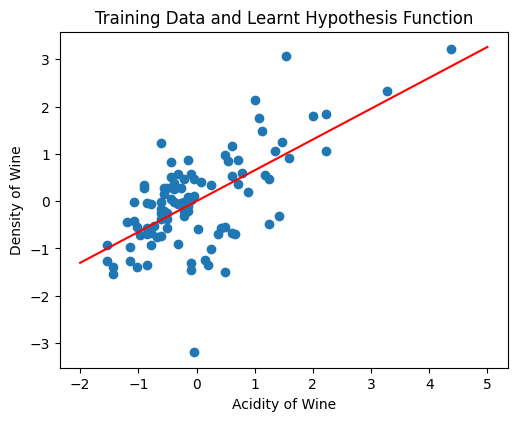

In [6]:
scatter_plt = plt.figure()
scatter_plt_axes = scatter_plt.add_axes([0.2, 0.2, 0.7, 0.7])
scatter_plt_axes.set_xlabel('Acidity of Wine')
scatter_plt_axes.set_ylabel('Density of Wine')
scatter_plt_axes.set_title('Training Data and Learnt Hypothesis Function')

# Commands to plot various plots
# Scatter Plot
plt_input_data(normalized_training_set_X, normalized_training_set_Y, scatter_plt_axes)
plt_hypothesis_function(theta_params, scatter_plt_axes)

MESH PLOT

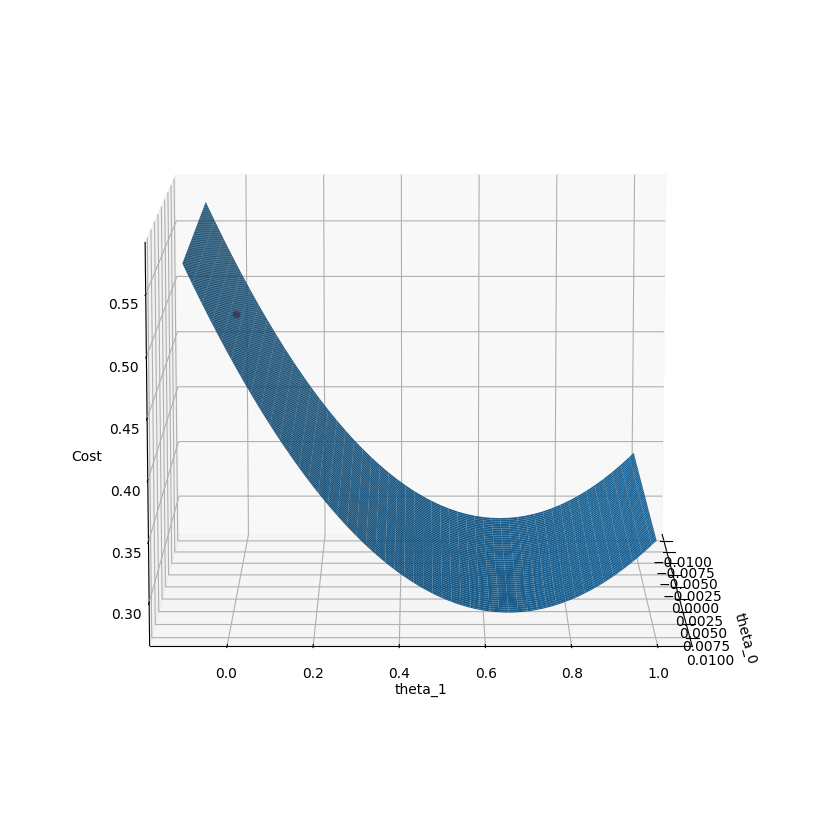

In [7]:
# Figure for Mesh Plot and Cost Function Animation
mesh_plot = plt.figure(figsize=(8,8))
mesh_plot_axes = mesh_plot.add_axes([0, 0, 1, 1], projection='3d')
mesh_plot_axes.set_xlabel('theta_0', labelpad=20)
mesh_plot_axes.set_ylabel('theta_1')
mesh_plot_axes.set_zlabel('Cost', labelpad=10)
mesh_plot_axes.view_init(elev=10, azim=0)

# Mesh Plot
plt_mesh(mesh_plot_axes)
show_cost_change_animation(theta_0_values, theta_1_values, cost_function_values, mesh_plot_axes)

CONTOUR PLOT

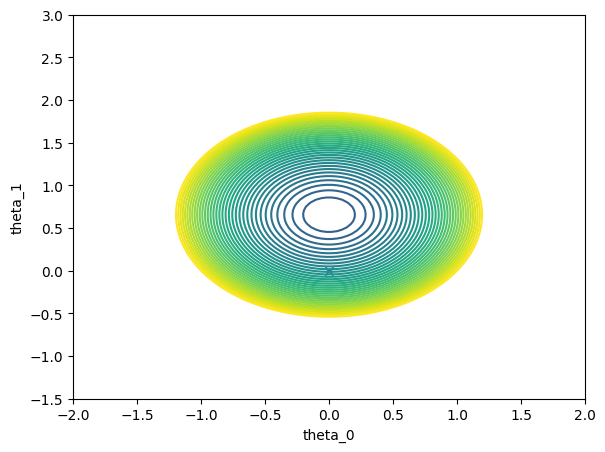

In [8]:
# Figure for Contour Plot and Contour Plot Animation
contour_plot = plt.figure()
contour_plot_axes = contour_plot.add_axes([0.1, 0.1, 0.8, 0.8])
contour_plot_axes.set_xlabel('theta_0')
contour_plot_axes.set_ylabel('theta_1')
contour_plot_axes.set_ylim(-1.5, 3)

# Contour Plot
show_contour_plt_animation(theta_0_values, theta_1_values, contour_plot_axes)